In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/san-francisco-crime-data/Police_Department_Incident_Reports__2018_to_Present.csv
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.shx
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.sbx
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.shp
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.shp.xml
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.prj
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.sbn
/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.dbf


In [2]:
#import packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.__version__

'0.10.0'

In [3]:
#read crime dataset
crime = pd.read_csv('/kaggle/input/san-francisco-crime-data/Police_Department_Incident_Reports__2018_to_Present.csv')

In [4]:
#there are some extraneous/unuseful columns that we will remove
#~5% rows have NULL coordinates and crime category, these will be unuseful to us as we are trying to analyze crime geospatial distribution
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223958 entries, 0 to 223957
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     223958 non-null  object 
 1   Incident Date                                         223958 non-null  object 
 2   Incident Time                                         223958 non-null  object 
 3   Incident Year                                         223958 non-null  int64  
 4   Incident Day of Week                                  223958 non-null  object 
 5   Report Datetime                                       223958 non-null  object 
 6   Row ID                                                223958 non-null  int64  
 7   Incident ID                                           223958 non-null  int64  
 8   Incident Number                             

In [5]:
#Drop rows with NULL point and incident category and convert incident time to datetime type, still have around 95% of data available
#210911 incidents
crime = crime.dropna(subset=['point','Incident Category'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210911 entries, 2 to 223957
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     210911 non-null  object 
 1   Incident Date                                         210911 non-null  object 
 2   Incident Time                                         210911 non-null  object 
 3   Incident Year                                         210911 non-null  int64  
 4   Incident Day of Week                                  210911 non-null  object 
 5   Report Datetime                                       210911 non-null  object 
 6   Row ID                                                210911 non-null  int64  
 7   Incident ID                                           210911 non-null  int64  
 8   Incident Number                             

In [6]:
pd.options.display.max_columns = None
crime.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,II,Initial,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,FRANKLIN ST \ EDDY ST,25191000.0,Northern,Western Addition,5.0,37.782685,-122.422464,"(37.78268536745206, -122.42246374465972)",100.0,4.0,11.0,39.0,NaN,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,IS,Initial Supplement,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,ANZA ST \ 06TH AVE,27275000.0,Richmond,Inner Richmond,1.0,37.779091,-122.464145,"(37.779090726308574, -122.46414497098554)",5.0,8.0,4.0,11.0,NaN,NaN,NaN,NaN
5,2019/06/10 06:57:00 PM,2019/06/10,18:57,2019,Monday,2019/06/10 06:57:00 PM,81021904134,810219,190417987,191613730.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Cite or Arrest Adult,ELLIS ST \ HYDE ST,25144000.0,Tenderloin,Tenderloin,6.0,37.784449,-122.416072,"(37.784448840613585, -122.41607173623363)",20.0,5.0,10.0,36.0,NaN,NaN,1.0,NaN
7,2019/06/10 01:30:00 AM,2019/06/10,01:30,2019,Monday,2019/06/10 02:53:00 AM,80997904134,809979,190416070,191610294.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,ONONDAGA AVE \ OCEAN AVE,22077000.0,Ingleside,Outer Mission,11.0,37.723168,-122.442554,"(37.723168313513796, -122.44255366318426)",80.0,9.0,1.0,28.0,NaN,NaN,NaN,NaN
8,2019/06/09 11:08:00 PM,2019/06/09,23:08,2019,Sunday,2019/06/10 09:28:00 PM,81026328150,810263,190418264,191612805.0,II,Initial,NaN,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,QUINCY ST \ CALIFORNIA ST,24746000.0,Central,Financial District/South Beach,3.0,37.792487,-122.405654,"(37.792486577710505, -122.40565433889059)",104.0,6.0,3.0,8.0,NaN,NaN,NaN,NaN


In [7]:
#keep only the columns that will be useful
#omitting neighborhood because we will join to another neighborhood dataset with mapped boundaries later
crime_filtered = crime[['Incident ID','Incident Date','Incident Time','Incident Day of Week','Incident Category','Incident Subcategory',
                        'Resolution','Police District','Latitude','Longitude']]
crime_filtered.head()

,Incident ID,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Subcategory,Resolution,Police District,Latitude,Longitude
2,810060,2019/06/05,14:00,Wednesday,Non-Criminal,Non-Criminal,Open or Active,Northern,37.782685,-122.422464
4,810123,2019/06/10,11:00,Monday,Non-Criminal,Non-Criminal,Open or Active,Richmond,37.779091,-122.464145
5,810219,2019/06/10,18:57,Monday,Assault,Simple Assault,Cite or Arrest Adult,Tenderloin,37.784449,-122.416072
7,809979,2019/06/10,01:30,Monday,Assault,Simple Assault,Open or Active,Ingleside,37.723168,-122.442554
8,810263,2019/06/09,23:08,Sunday,Malicious Mischief,Vandalism,Open or Active,Central,37.792487,-122.405654


In [8]:
#rename columns for brevity sake
crime_filtered.rename(columns={'Incident Date':'Date','Incident Time':'Time','Incident Day of Week':'Day of Week',
                               'Incident Category':'Category','Incident Subcategory':'Subcategory'},inplace=True)
crime_filtered.head()

,Incident ID,Date,Time,Day of Week,Category,Subcategory,Resolution,Police District,Latitude,Longitude
2,810060,2019/06/05,14:00,Wednesday,Non-Criminal,Non-Criminal,Open or Active,Northern,37.782685,-122.422464
4,810123,2019/06/10,11:00,Monday,Non-Criminal,Non-Criminal,Open or Active,Richmond,37.779091,-122.464145
5,810219,2019/06/10,18:57,Monday,Assault,Simple Assault,Cite or Arrest Adult,Tenderloin,37.784449,-122.416072
7,809979,2019/06/10,01:30,Monday,Assault,Simple Assault,Open or Active,Ingleside,37.723168,-122.442554
8,810263,2019/06/09,23:08,Sunday,Malicious Mischief,Vandalism,Open or Active,Central,37.792487,-122.405654


Text(0.5, 1.0, 'Distribution of resolution types')

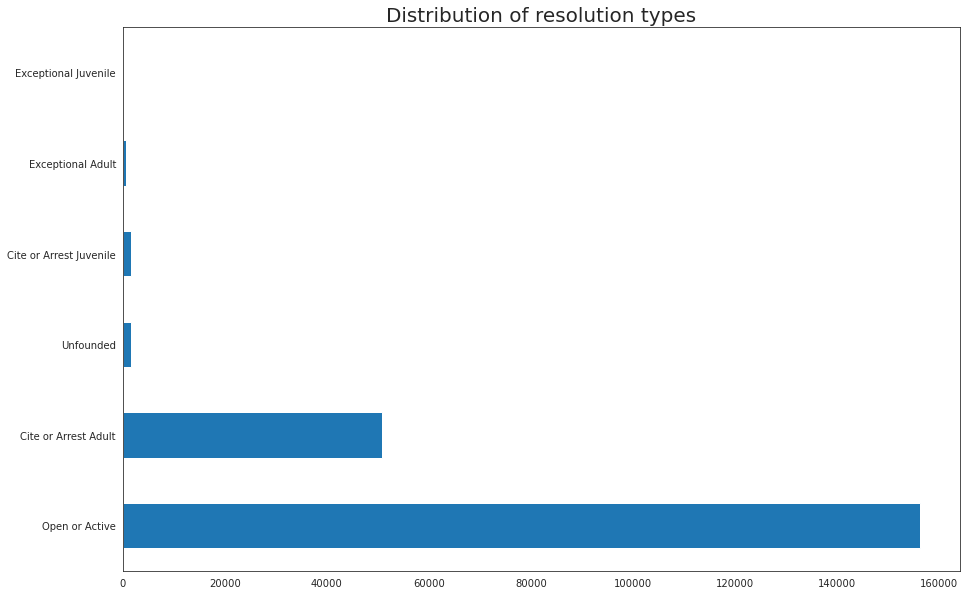

In [9]:
#taking a look at resolution types, we see that majority of incidents are not resolved (open or active) 
#while the majority of resolved incidents resulted in a citation/arrest of an adult
crime_filtered["Resolution"].value_counts().plot(kind='barh',figsize=(15,10))
plt.title("Distribution of resolution types",fontsize=20)

In [10]:
#We will filter out the incidents with unfounded resolution type as those are unsubstantiated reports and don't represent actual crimes
crime_actual = crime_filtered[(crime_filtered["Resolution"]!="Unfounded")]


#group together the resolved categories (cite or arrest AND exceptional resolution) into one category for easier comparison
res_dict = {"Unresolved":["Open or Active"],
          "Resolved": ["Cite or Arrest Adult","Cite or Arrest Juvenile","Exceptional Adult","Exceptional Juvenile"]}
new_res = pd.Series(res_dict).explode().sort_values()
res_map = dict(zip(new_res.values,new_res.index))
crime_actual["Resolution"]=crime_actual["Resolution"].map(res_map).astype('category')
crime_actual.head()

,Incident ID,Date,Time,Day of Week,Category,Subcategory,Resolution,Police District,Latitude,Longitude
2,810060,2019/06/05,14:00,Wednesday,Non-Criminal,Non-Criminal,Unresolved,Northern,37.782685,-122.422464
4,810123,2019/06/10,11:00,Monday,Non-Criminal,Non-Criminal,Unresolved,Richmond,37.779091,-122.464145
5,810219,2019/06/10,18:57,Monday,Assault,Simple Assault,Resolved,Tenderloin,37.784449,-122.416072
7,809979,2019/06/10,01:30,Monday,Assault,Simple Assault,Unresolved,Ingleside,37.723168,-122.442554
8,810263,2019/06/09,23:08,Sunday,Malicious Mischief,Vandalism,Unresolved,Central,37.792487,-122.405654


In [11]:
#Most Recent date in dataset
print(crime_actual['Date'].max())

2019/07/01


In [12]:
#Earliest date in dataset
#This dataset covers about 1 1/2 year worth of data
print(crime_actual['Date'].min())

2018/01/01


Text(0.5, 1.0, 'Distribution of incident categories')

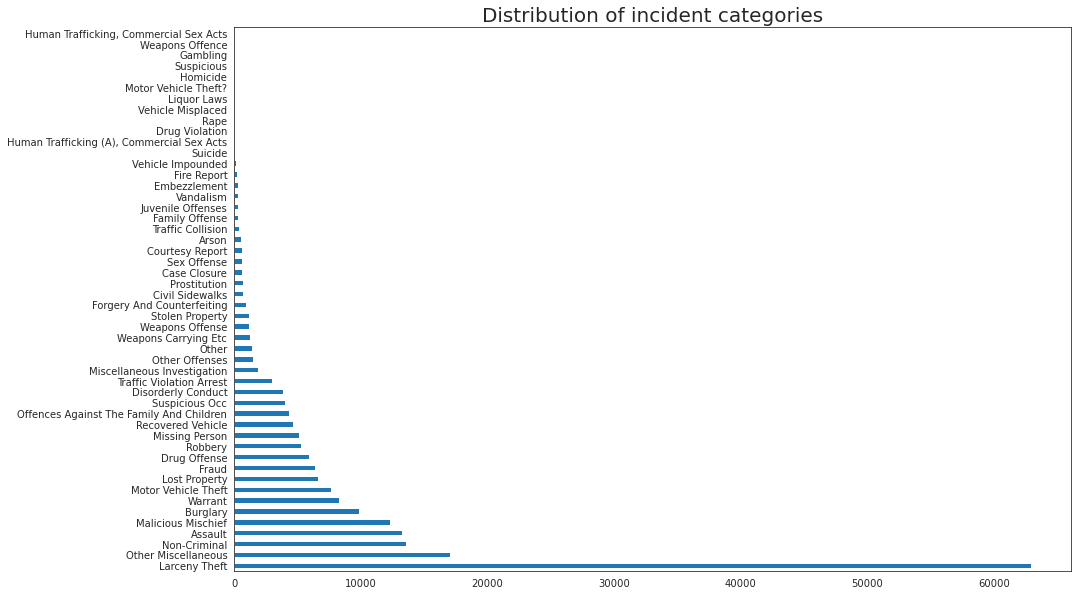

In [13]:
#plot crime category distributions
#there are a lot of categories with few incidences
#theft is the most common type of reported incidents
crime_actual["Category"].value_counts().plot(kind='barh',figsize=(15,10))
plt.title("Distribution of incident categories",fontsize=20)

Text(0.5, 1.0, 'Distribution of misc incident subcategories')

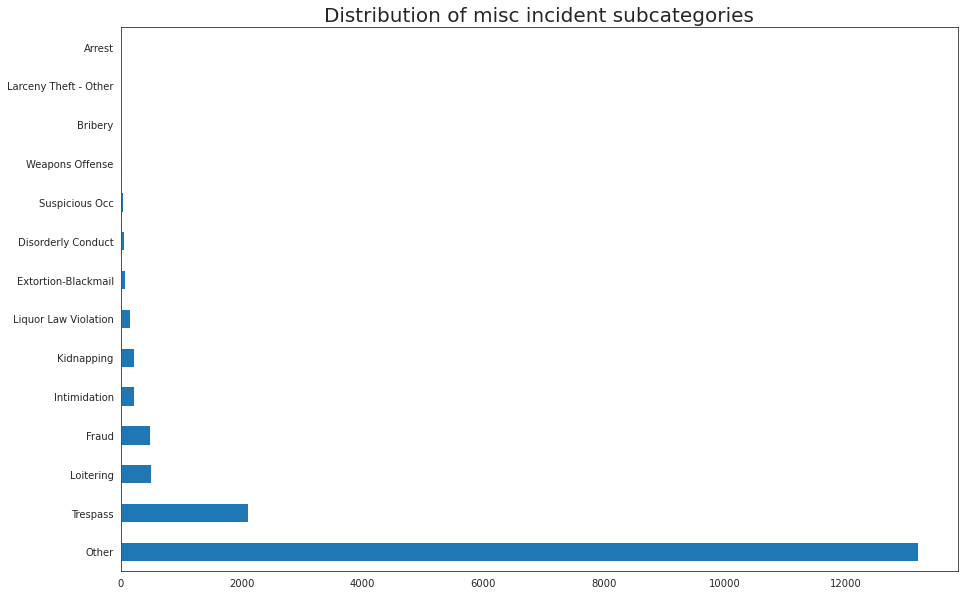

In [14]:
#it also looks like the "other miscellaneous" category actually contains many subcategories that should be used as main categories
crime_actual["Subcategory"].loc[crime_actual["Category"]=="Other Miscellaneous"].value_counts().plot(kind='barh',figsize=(15,10))
plt.title("Distribution of misc incident subcategories",fontsize=20)

In [15]:
#so we will use the subcategory column of those rows as the category column
crime_actual["Category"].loc[crime_actual["Category"]=="Other Miscellaneous"] = crime_actual["Subcategory"].loc[crime_actual["Category"]=="Other Miscellaneous"].copy()

Text(0.5, 1.0, 'Distribution of crime categories')

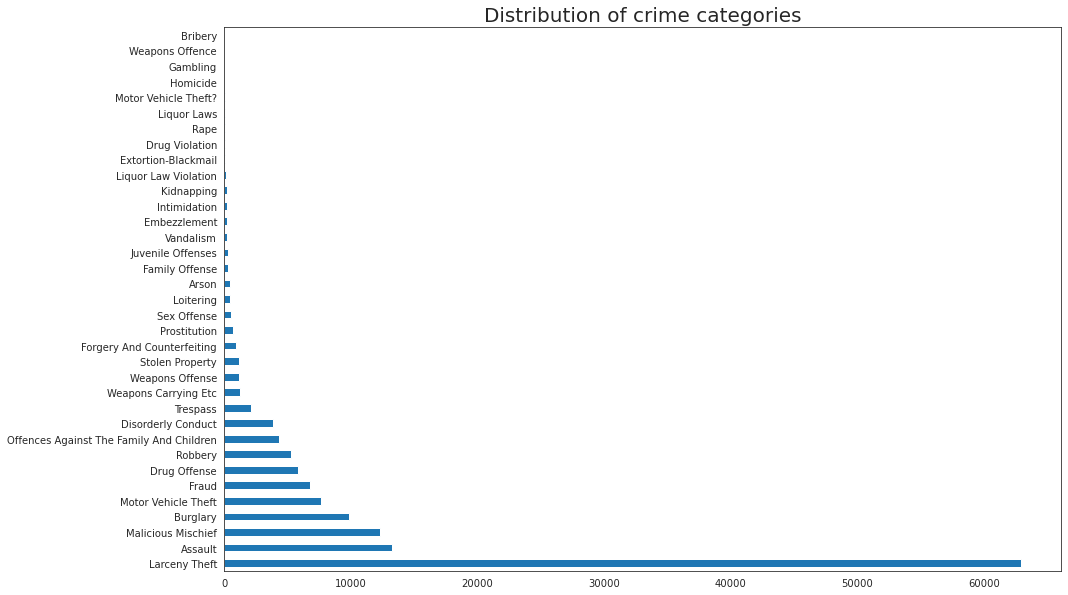

In [16]:
#we will filter out non-crime and uncategorizable incidents
#like case closure, warrants and suspicious occurences 

crime_major = crime_actual[(crime_actual["Category"]!="Non-Criminal")&
                    (crime_actual["Category"].str.contains("Other")==False)&
                    (crime_actual["Category"].str.contains("Suspicious")==False)&
                    (crime_actual["Category"].str.contains("Report")==False)&
                    (crime_actual["Category"].str.contains("Traffic")==False)&
                    (crime_actual["Category"]!="Warrant")&
                    (crime_actual["Category"]!="Civil Sidewalks")&
                    (crime_actual["Category"]!="Miscellaneous Investigation")&
                    (crime_actual["Category"]!="Vehicle Misplaced")&
                    (crime_actual["Category"]!="Vehicle Impounded")&
                    (crime_actual["Category"]!="Recovered Vehicle")&
                    (crime_actual["Category"]!="Suicide")&
                    (crime_actual["Category"]!="Missing Person")&
                    (crime_actual["Category"]!="Lost Property")&
                    (crime_actual["Category"]!="Case Closure")&
                    (crime_actual["Category"]!="Arrest")]
crime_major["Category"].value_counts().plot(kind='barh',figsize=(15,10))
plt.title("Distribution of crime categories",fontsize=20)

In [17]:
# regroup the crimes into four main categories according to https://www.justia.com/criminal/offenses/
# then drop subcategory column
cat_dict = {"Property Crimes":["Larceny Theft","Burglary","Motor Vehicle Theft","Motor Vehicle Theft?",
                              "Stolen Property","Robbery","Recovered Vehicle","Stolen Property","Vandalism","Trespass"],
          "Personal Crimes":["Assault","Homicide","Weapons Offense","Weapons Offence","Rape","Arson","Sex Offense",
                             "Kidnapping","Extortion-Blackmail","Intimidation",
                             "Human Trafficking (A), Commercial Sex Acts","Human Trafficking, Commercial Sex Acts"],
          "Statutory Crimes": ["Malicious Mischief","Drug Offense","Drug Violation","Disorderly Conduct","Weapons Carrying Etc", "Liquor Laws",
                               "Liquor Law Violation","Prostitution","Offences Against The Family And Children","Family Offense",
                               "Juvenile Offenses","Loitering","Gambling"],
          "Financial Crimes": ["Fraud","Forgery And Counterfeiting","Embezzlement","Bribery"]}
new_cat = pd.Series(cat_dict).explode().sort_values()
cat_map = dict(zip(new_cat.values,new_cat.index))
crime_major["Category"]=crime_major["Category"].map(cat_map).astype('category')
crime_major.drop(columns=['Subcategory'])
crime_major.head()

,Incident ID,Date,Time,Day of Week,Category,Subcategory,Resolution,Police District,Latitude,Longitude
5,810219,2019/06/10,18:57,Monday,Personal Crimes,Simple Assault,Resolved,Tenderloin,37.784449,-122.416072
7,809979,2019/06/10,01:30,Monday,Personal Crimes,Simple Assault,Unresolved,Ingleside,37.723168,-122.442554
8,810263,2019/06/09,23:08,Sunday,Statutory Crimes,Vandalism,Unresolved,Central,37.792487,-122.405654
9,810040,2019/06/03,13:15,Monday,Property Crimes,Larceny Theft - Other,Unresolved,Park,37.770964,-122.431904
10,810005,2019/06/08,02:15,Saturday,Property Crimes,Larceny - From Vehicle,Unresolved,Park,37.765323,-122.443538


In [18]:
#now we are left with 143134 incidents
crime_major.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143134 entries, 5 to 223957
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Incident ID      143134 non-null  int64   
 1   Date             143134 non-null  object  
 2   Time             143134 non-null  object  
 3   Day of Week      143134 non-null  object  
 4   Category         143134 non-null  category
 5   Subcategory      143134 non-null  object  
 6   Resolution       143134 non-null  category
 7   Police District  143134 non-null  object  
 8   Latitude         143134 non-null  float64 
 9   Longitude        143134 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(5)
memory usage: 10.1+ MB


Text(0.5, 1.0, 'Distribution of crime category')

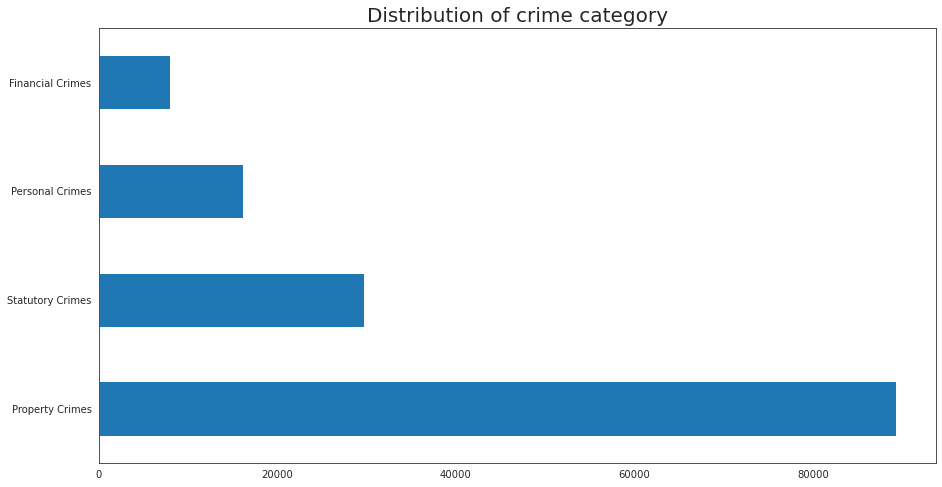

In [19]:
#new aggregated crime category distribution
crime_major["Category"].value_counts().plot(kind='barh',figsize=(15,8))
plt.title("Distribution of crime category",fontsize=20)

In [20]:
#how do these different crime categories compare in terms of resolution percentage?
#property crimes rarely get resolved while nearly half of statutory crimes are resolved
crime_major[crime_major["Resolution"]=="Resolved"]["Category"].value_counts()/crime_major["Category"].value_counts()*100

Financial Crimes    12.010476
Personal Crimes     35.571924
Property Crimes      9.974912
Statutory Crimes    43.476210
Name: Category, dtype: float64

In [21]:
#which police district report the most crimes?
#crimes are mostly concentrated near downtown/financial district which makes sense
crime_major["Police District"].value_counts()

Central       25147
Northern      21112
Mission       19129
Southern      17969
Tenderloin    13469
Bayview       11881
Ingleside      9999
Taraval        9905
Richmond       7808
Park           5892
Out of SF       823
Name: Police District, dtype: int64

In [22]:
#which police district resolve the most crimes?
#most districts have around similar crime resolution rate except for tenderloin and mission which are a lot better at resolving the cases
crime_major[crime_major["Resolution"]=="Resolved"]["Police District"].value_counts()/crime_major["Police District"].value_counts()*100

Bayview       17.330191
Central       18.475365
Ingleside     19.091909
Mission       24.643212
Northern      12.348427
Out of SF     11.178615
Park          16.887305
Richmond      12.653689
Southern      18.999388
Taraval       14.538112
Tenderloin    41.977875
Name: Police District, dtype: float64

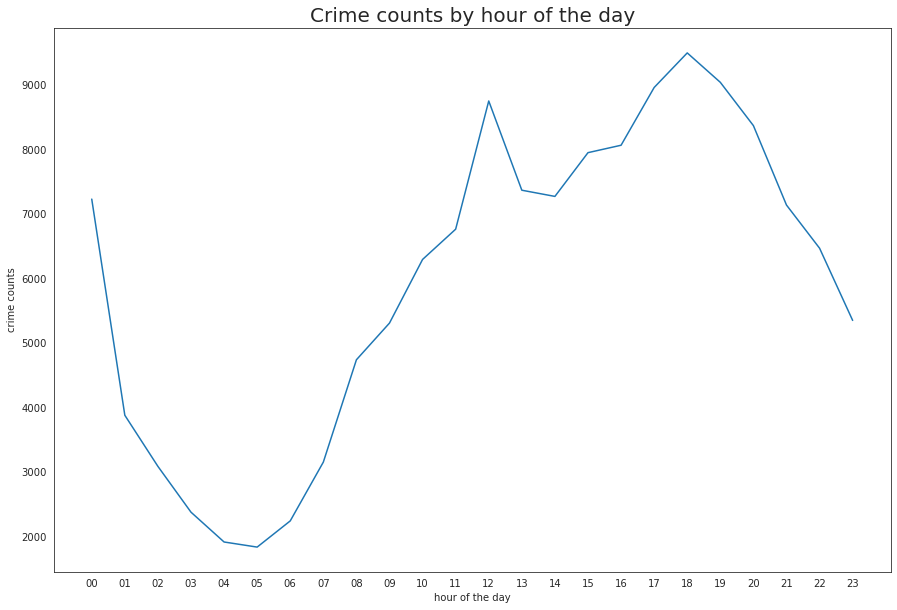

In [23]:
#when do crimes usually happen throughout a day?
from datetime import datetime

time = pd.to_datetime(crime_major['Time'])
hour = time.dt.strftime("%H").value_counts().sort_index()

plt.figure(figsize=(15,10))
plt.plot(hour)

#crime peaks around noon and also around 6pm (when people are getting off work)
plt.xlabel('hour of the day')
plt.ylabel('crime counts')
plt.title("Crime counts by hour of the day",fontsize=20)
plt.show()

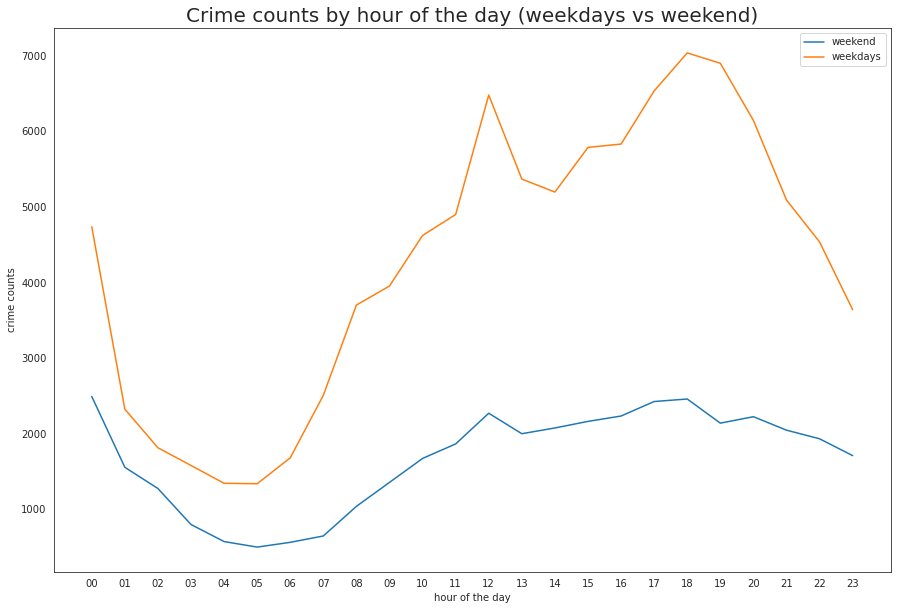

In [24]:
#is there a difference between crime patterns during weekdays and weekends?
weekend = pd.to_datetime(crime_major["Time"].loc[(crime_major["Day of Week"]=="Saturday")|(crime_major["Day of Week"]=="Sunday")])
weekend_hour = weekend.dt.strftime("%H").value_counts().sort_index()
                                                 
weekdays = pd.to_datetime(crime_major["Time"].loc[(crime_major["Day of Week"]!="Saturday")&(crime_major["Day of Week"]!="Sunday")])
weekdays_hour = weekdays.dt.strftime("%H").value_counts().sort_index()

plt.figure(figsize=(15,10))
plt.plot(weekend_hour,label='weekend')
plt.plot(weekdays_hour,label='weekdays')                                              

#weekend crime patterns look similar to weekdays but overall are more diminished, especially around the usual crime peak hours
plt.xlabel('hour of the day')
plt.ylabel('crime counts')
plt.legend()
plt.title("Crime counts by hour of the day (weekdays vs weekend)",fontsize=20)
plt.show()

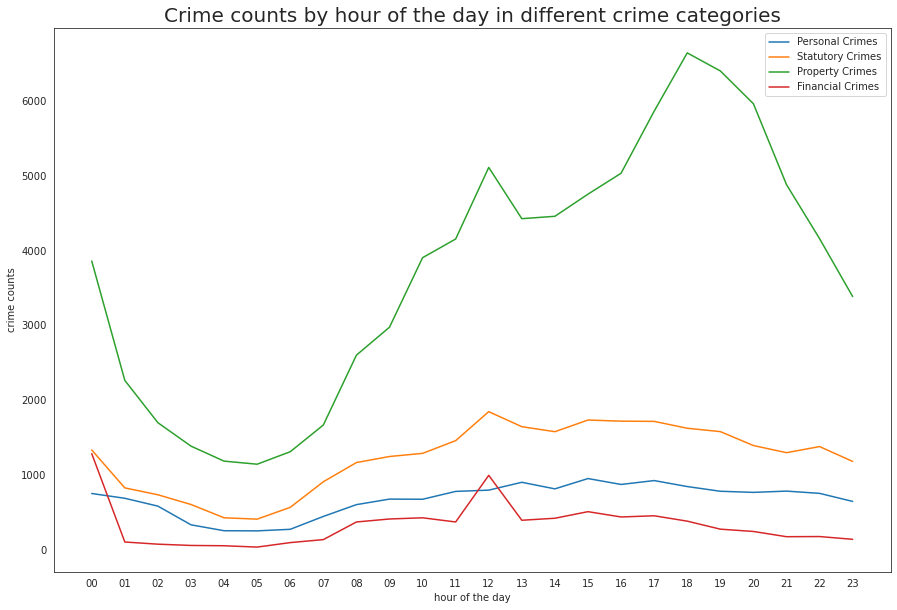

In [25]:
#what about differences between different crime categories?
plt.figure(figsize=(15,10))

for i in crime_major['Category'].unique():    
    x = pd.to_datetime(crime_major["Time"].loc[crime_major['Category']==i])
    x1 = x.dt.strftime("%H").value_counts().sort_index()
    plt.plot(x1,label=i)

#the pattern is a lot more pronounced in property crimes than other types 
plt.xlabel('hour of the day')
plt.ylabel('crime counts')
plt.legend()
plt.title("Crime counts by hour of the day in different crime categories",fontsize=20)
plt.show()

In [26]:
#import neighborhood geodata to map where are crimes concentrated geographically
import geopandas
import json

shp_file = geopandas.read_file('/kaggle/input/san-francisco-neighborhood-maps/planning_neighborhoods.shp')
shp_file_4326 = shp_file.to_crs(epsg='4326')

shp_file_4326.to_file("sf_neighborhoods.geojson",driver='GeoJSON')

with open("sf_neighborhoods.geojson") as f:
    gjson = json.load(f)

In [27]:
#the feature field contains the geometry boundaries for each neighborhood
gjson['features'][0]['geometry']

{'type': 'Polygon',
 'coordinates': [[[-122.48408901229004, 37.787910338955726],
   [-122.48434628535283, 37.78765448824036],
   [-122.4874336833941, 37.78749095608176],
   [-122.48712304119886, 37.7837599128888],
   [-122.4925264326063, 37.78350142122932],
   [-122.49240685083515, 37.78166318208234],
   [-122.50531713020246, 37.78099816751464],
   [-122.5051435624088, 37.77977427559416],
   [-122.50619999677693, 37.779867834016],
   [-122.5078182605693, 37.77995181586095],
   [-122.50950373998992, 37.77992309846863],
   [-122.50934217021594, 37.77914513251913],
   [-122.50909465530911, 37.775189984579534],
   [-122.51316878073172, 37.775046066844205],
   [-122.51317047576994, 37.775108601718365],
   [-122.51314951362194, 37.77520217906853],
   [-122.51316769730231, 37.775295087007386],
   [-122.51313873820945, 37.77538258599354],
   [-122.51315523821476, 37.775413377040906],
   [-122.51311828102709, 37.77549479767991],
   [-122.51311609117492, 37.775992002895315],
   [-122.51321989423

In [28]:
#making a new empty column in the original df for more precise neighborhood placement
crime_major['Neighborhood'] = ''
crime_major.head()

,Incident ID,Date,Time,Day of Week,Category,Subcategory,Resolution,Police District,Latitude,Longitude,Neighborhood
5,810219,2019/06/10,18:57,Monday,Personal Crimes,Simple Assault,Resolved,Tenderloin,37.784449,-122.416072,
7,809979,2019/06/10,01:30,Monday,Personal Crimes,Simple Assault,Unresolved,Ingleside,37.723168,-122.442554,
8,810263,2019/06/09,23:08,Sunday,Statutory Crimes,Vandalism,Unresolved,Central,37.792487,-122.405654,
9,810040,2019/06/03,13:15,Monday,Property Crimes,Larceny Theft - Other,Unresolved,Park,37.770964,-122.431904,
10,810005,2019/06/08,02:15,Saturday,Property Crimes,Larceny - From Vehicle,Unresolved,Park,37.765323,-122.443538,


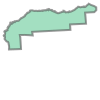

In [29]:
#using the gjson package we can plot shape of each neighborhood
from shapely.geometry import shape, Point

lon = crime_major.columns.get_loc('Longitude')
lat = crime_major.columns.get_loc('Latitude')

point = Point(crime_major.iloc[0,lon],crime_major.iloc[0,lat])

feature = gjson['features'][0]
shape(feature['geometry'])

In [ ]:
#then we iterate through each incident's geolocation to see which neighborhood's boundary does the incident fall under
for i in range(len(crime_major)):
    point = Point(crime_major.iloc[i,lon],crime_major.iloc[i,lat])
    
    for feature in gjson['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            crime_major.iloc[i, crime_major.columns.get_loc('Neighborhood')] = feature['properties']['neighborho']

crime_major.to_csv("./crime_major_hood.csv",index = False)
crime_major = pd.read_csv("./crime_major_hood.csv")
crime_major.head()

In [ ]:
#get list of all the unique neighborhoods
crime_major['Neighborhood'].unique()

In [ ]:
crime_major.info()

In [ ]:
#some crimes happen outside of SF, let's discard them
crime_major['Neighborhood'].replace('',np.nan,inplace=True)
crime_major.dropna(subset=['Neighborhood'], inplace=True)
crime_major.info()

In [ ]:
#differences in crime patterns in these neighborhoods?
plt.figure(figsize=(15,10))

for i in crime_major['Neighborhood'].unique():
    x = pd.to_datetime(crime_major["Time"].loc[crime_major['Neighborhood']==i])
    x1 = x.dt.strftime("%H").value_counts().sort_index()
    plt.plot(x1,label=i)

#most neighborhoods are fairly similar in their patterns except for the ones near downtown which have high peaks around noon and 5-7pm
plt.xlabel('hour of the day')
plt.ylabel('crime counts')
plt.legend()
plt.title("Crime counts by hour of the day in different neighborhoods",fontsize=20)
plt.show()

In [ ]:
#make a df that counts how many crimes are in each neighborhood
crime_neighborhood = pd.DataFrame(crime_major.groupby(["Neighborhood"])["Incident ID"].count())
crime_neighborhood.rename(columns={'Incident ID':'count'},inplace=True)
crime_neighborhood.head(4)

In [ ]:
#make a new df that aggregates number of different categories of crimes in each neighborhood as well as each crime category's percentage
crime_grouped = pd.DataFrame(crime_major.groupby(["Neighborhood","Category"])["Incident ID"].count())
crime_grouped["pct"] = crime_grouped.groupby(level=0).apply(lambda x: 100*x/x.sum())
crime_grouped.rename(columns={'Incident ID':'count'},inplace=True)
crime_grouped.head(4)

In [ ]:
#for plotting purposes we will pivot this grouped df so that each neighborhood only contains one row and each column is the percentage of crime in each neighborhood
crime_grouped = pd.pivot_table(crime_grouped,values="pct",index=["Neighborhood"],columns="Category")
#then we will join this table to the df earlier to get total crime counts in each neighborhood
crime_grouped = crime_grouped.join(crime_neighborhood,on="Neighborhood")
crime_grouped.rename(columns={'count':'Total Crimes'},inplace=True)
crime_grouped.head()

In [ ]:
#using folium to plot a map of SF
import folium
latitude = 37.77
longitude = -122.42
sf_map = folium.Map(location=[latitude,longitude],zoom_start=13)
sf_map

In [ ]:
#plot heat map of where crimes are happening in the city
from folium.plugins import HeatMap

sf_map = folium.Map(location=[latitude,longitude],zoom_start=14)
heat_data = [[row['Latitude'],row['Longitude']]for index, row in crime_major.iterrows()]
HeatMap(heat_data,min_opacity=100,radius=8,max_zoom=14).add_to(sf_map)
sf_map

In [ ]:
#make a new geopandas df to find center of each neighborhood so we can place a popup there showing the crime composition of each neighborhood
#then merge to the crime df
from shapely.geometry import shape
import geopandas as gpd

gdf = gpd.GeoDataFrame.from_features(gjson['features'])
gdf['center'] = gdf['geometry'].centroid
gdf.rename(columns={'neighborho':'Neighborhood'},inplace=True)
gdf_crime = gdf.merge(crime_grouped,on="Neighborhood")
gdf_crime.head()

In [ ]:
#plot a chropleth map of the crimes in each neighborhood
sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

folium.Choropleth(
    geo_data=gjson,
    data=gdf_crime,
    columns=['Neighborhood', 'Total Crimes'],
    key_on='feature.properties.neighborho',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
).add_to(sf_map)

#then add a layer of popups describing the crime composition in each neighborhood
for row in gdf_crime.iterrows():
    row_values = row[1]
    center_point = row_values['center']
    location = [center_point.y, center_point.x]
    popup = folium.Popup('<p><b>Neighborhood: ' + str(row_values['Neighborhood']) + '</b></p>' +
             '<p>Property Crimes Pct: '+str(round(row_values['Property Crimes'],2)) + '%</br>' +
             'Personal Crimes Pct: '+str(round(row_values['Personal Crimes'],2)) + '%</br>' +
             'Statutory Crimes Pct: '+str(round(row_values['Statutory Crimes'],2)) + '%</br>' +
             'Financial Crimes Pct: '+str(round(row_values['Financial Crimes'],2)) + '%</br></p>',min_width=450,max_width=450)
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(sf_map)

display(sf_map)
